In [425]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np

In [600]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/itog.csv',
                       sep=';', encoding='utf-8')

In [601]:
df.head()

,Name,mark,mark2,type,tokens,avdepth,madepth,midepth,acl,rel_cl,...,clauses,tunit,complex_tunit,coord_ph,poss,prep_ph,noun+adj,ger_inf_as_subj,noun+part,vp
0,AAl_13_1,best,best,1,282,4.2727,8,2,6,1,...,23,23,0,8,20,32,3,6,3,20
1,AAl_27_1,best,best,1,211,5.0000,10,3,0,0,...,14,14,0,5,25,44,2,6,0,12
2,AAl_30_1,best,best,1,232,3.7143,5,2,2,1,...,20,20,0,3,12,37,3,11,1,23
3,ZEv_3_1,best,best,1,201,4.7500,7,3,4,3,...,14,14,0,7,18,32,4,2,1,14
4,EEm_14_1,best,best,1,219,5.4444,7,4,4,0,...,18,18,0,3,19,37,3,10,1,22


In [602]:
new_df = df.drop(['Name', 'mark', 'type'], axis=1)

In [603]:
new_df.head()

,mark2,tokens,avdepth,madepth,midepth,acl,rel_cl,advcl,s,clauses,tunit,complex_tunit,coord_ph,poss,prep_ph,noun+adj,ger_inf_as_subj,noun+part,vp
0,best,282,4.2727,8,2,6,1,3,11,23,23,0,8,20,32,3,6,3,20
1,best,211,5.0000,10,3,0,0,1,10,14,14,0,5,25,44,2,6,0,12
2,best,232,3.7143,5,2,2,1,1,14,20,20,0,3,12,37,3,11,1,23
3,best,201,4.7500,7,3,4,3,2,8,14,14,0,7,18,32,4,2,1,14
4,best,219,5.4444,7,4,4,0,6,9,18,18,0,3,19,37,3,10,1,22


In [604]:
new_df.shape

(96, 19)

In [605]:
y = new_df.values[:, 0]

In [606]:
y

array(['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'non

In [607]:
X_new_df = new_df.drop(['mark2'], axis=1)
X_new_df[X_new_df.columns] = X_new_df[X_new_df.columns].astype(int)
X = X_new_df.values[:, 0:18]

In [608]:
X_new_df.head()

,tokens,avdepth,madepth,midepth,acl,rel_cl,advcl,s,clauses,tunit,complex_tunit,coord_ph,poss,prep_ph,noun+adj,ger_inf_as_subj,noun+part,vp
0,282,4,8,2,6,1,3,11,23,23,0,8,20,32,3,6,3,20
1,211,5,10,3,0,0,1,10,14,14,0,5,25,44,2,6,0,12
2,232,3,5,2,2,1,1,14,20,20,0,3,12,37,3,11,1,23
3,201,4,7,3,4,3,2,8,14,14,0,7,18,32,4,2,1,14
4,219,5,7,4,4,0,6,9,18,18,0,3,19,37,3,10,1,22


In [609]:
X_new_df.shape

(96, 18)

In [358]:
X

array([[282,   4,   8, ...,   6,   3,  20],
       [211,   5,  10, ...,   6,   0,  12],
       [232,   3,   5, ...,  11,   1,  23],
       ...,
       [108,   4,   7, ...,   7,   1,  14],
       [ 50,   3,   5, ...,   3,   0,   5],
       [ 93,   6,   7, ...,   8,   0,  13]])

# Дерево решений

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [452]:
classifier = DecisionTreeClassifier() 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [453]:
y_pred = classifier.predict(X_test)

In [454]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.33      0.75      0.46         4
    nonbest       0.91      0.62      0.74        16

avg / total       0.79      0.65      0.68        20



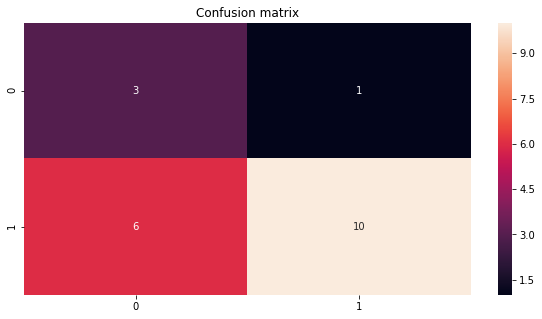

In [455]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [456]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.65


# Дерево решений с выбором лучших гиперпараметров

In [457]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_new_df.shape[1]),
}
clf_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf = GridSearchCV(clf_tree, parameters, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 18)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [458]:
y_pred = clf.predict(X_test)

In [459]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.60      0.75      0.67         4
    nonbest       0.93      0.88      0.90        16

avg / total       0.87      0.85      0.86        20



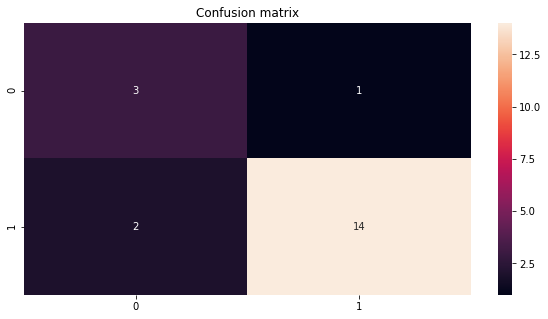

In [460]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [461]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.85


# RandomForestClassifier

In [462]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [463]:
y_pred = clf2.predict(X_test)

In [464]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.50      1.00      0.67         4
    nonbest       1.00      0.75      0.86        16

avg / total       0.90      0.80      0.82        20



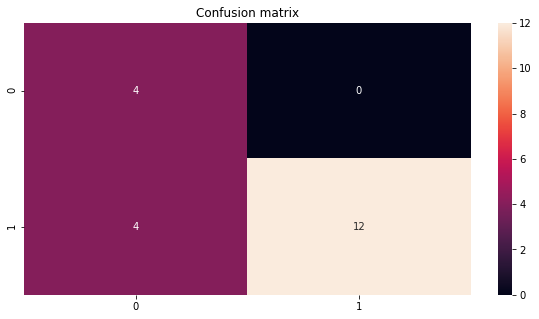

In [465]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [466]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8


# RandomForestClassifier с выбором лучших гиперпараметров

In [467]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(1)

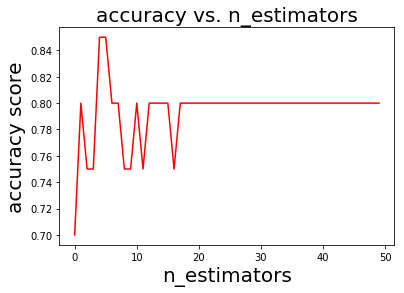

In [468]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [469]:
parameters = {
    'max_features': range(1, X_new_df.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 18), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [470]:
y_pred = clf2.predict(X_test)

In [471]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.67      1.00      0.80         4
    nonbest       1.00      0.88      0.93        16

avg / total       0.93      0.90      0.91        20



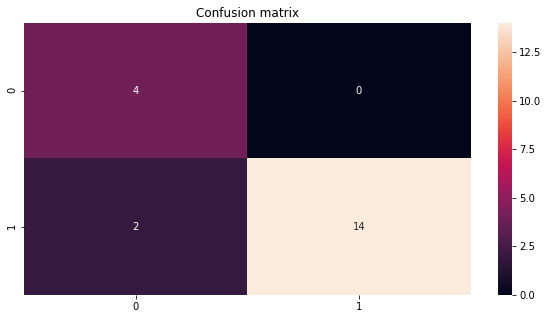

In [472]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [473]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9


# LogisticRegression c важными признаками ('l1')

In [474]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [475]:
y_pred = clf3.predict(X_test)

In [476]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.67      0.50      0.57         4
    nonbest       0.88      0.94      0.91        16

avg / total       0.84      0.85      0.84        20



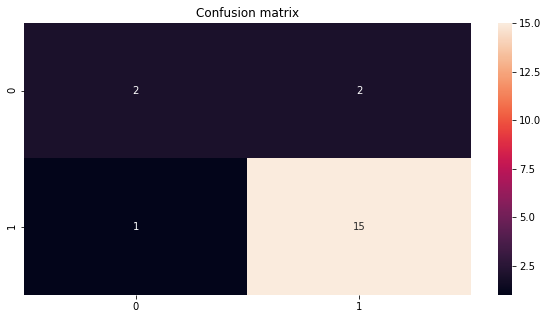

In [477]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [478]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.85


# LogisticRegression с лучшими гиперпараметрами

In [479]:
clf3 = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-20, 20))), 
                          scoring='accuracy',
                          class_weight='balanced',
                          multi_class='multinomial', 
                          random_state=23)
clf3.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0, 10000000000.0, 100000000000.0, 1000000000000.0, 10000000000000.0, 100000000000000.0, 1000000000000000.0, 1e+16, 1e+17, 1e+18, 1e+19],
           class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=23, refit=True, scoring='accuracy', solver='lbfgs',
           tol=0.0001, verbose=0)

In [480]:
y_pred = clf3.predict(X_test)

In [481]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.67      0.50      0.57         4
    nonbest       0.88      0.94      0.91        16

avg / total       0.84      0.85      0.84        20



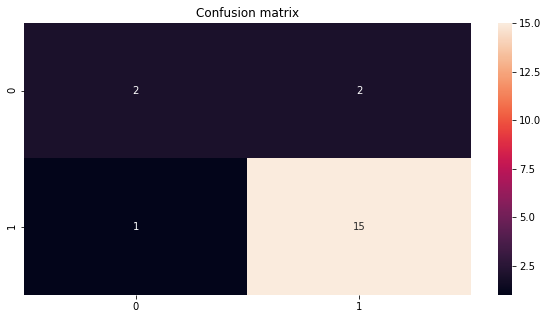

In [482]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [483]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.85


# Разделение на три класса

In [486]:
new_df2 = df.drop(['Name', 'mark2', 'type'], axis=1)

In [487]:
new_df2.head()

,mark,tokens,avdepth,madepth,midepth,acl,rel_cl,advcl,s,clauses,tunit,complex_tunit,coord_ph,poss,prep_ph,noun+adj,ger_inf_as_subj,noun+part,vp
0,best,282,4.2727,8,2,6,1,3,11,23,23,0,8,20,32,3,6,3,20
1,best,211,5.0000,10,3,0,0,1,10,14,14,0,5,25,44,2,6,0,12
2,best,232,3.7143,5,2,2,1,1,14,20,20,0,3,12,37,3,11,1,23
3,best,201,4.7500,7,3,4,3,2,8,14,14,0,7,18,32,4,2,1,14
4,best,219,5.4444,7,4,4,0,6,9,18,18,0,3,19,37,3,10,1,22


In [488]:
y = new_df2.values[:, 0]

In [489]:
X_new_df2 = new_df2.drop(['mark'], axis=1)
X_new_df2[X_new_df2.columns] = X_new_df2[X_new_df2.columns].astype(int)
X = X_new_df2.values[:, 0:18]

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# LogisticRegression c важными признаками ('l1')

In [491]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [492]:
y_pred = clf3.predict(X_test)

In [493]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.43      0.30      0.35        10
       best       0.38      0.43      0.40         7
      worst       0.60      1.00      0.75         3

avg / total       0.44      0.45      0.43        20



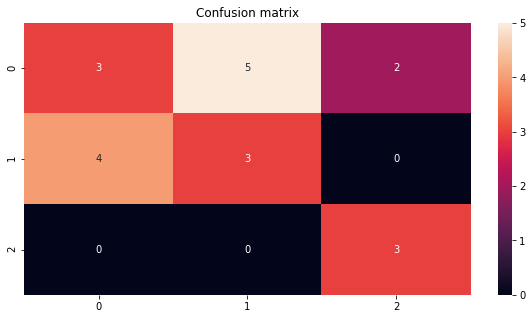

In [494]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [495]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.45


# LogisticRegression с лучшими гиперпараметрами

In [496]:
clf3 = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-20, 20))), 
                          scoring='accuracy',
                          class_weight='balanced',
                          multi_class='multinomial', 
                          random_state=23)
clf3.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0, 10000000000.0, 100000000000.0, 1000000000000.0, 10000000000000.0, 100000000000000.0, 1000000000000000.0, 1e+16, 1e+17, 1e+18, 1e+19],
           class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=23, refit=True, scoring='accuracy', solver='lbfgs',
           tol=0.0001, verbose=0)

In [497]:
y_pred = clf3.predict(X_test)

In [498]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.33      0.10      0.15        10
       best       0.42      0.71      0.53         7
      worst       0.60      1.00      0.75         3

avg / total       0.40      0.45      0.37        20



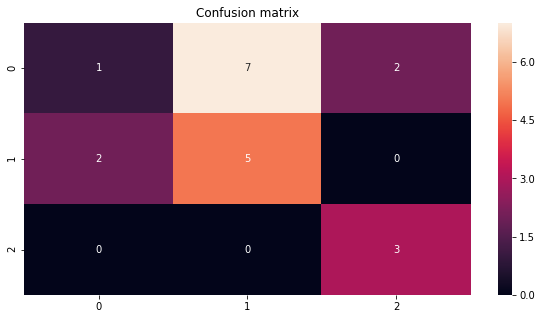

In [499]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [500]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.45


# Дерево решений

In [502]:
classifier = DecisionTreeClassifier() 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [503]:
y_pred = classifier.predict(X_test)

In [504]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.50      0.30      0.37        10
       best       0.36      0.57      0.44         7
      worst       0.67      0.67      0.67         3

avg / total       0.48      0.45      0.44        20



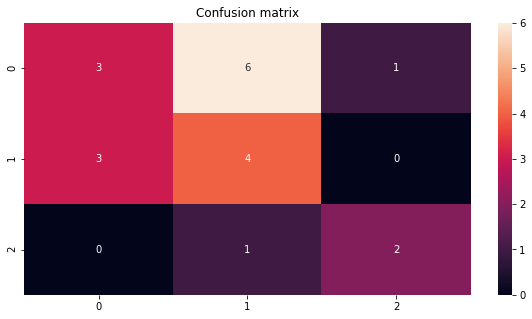

In [505]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [506]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.45


# Дерево решений с выбором лучших гиперпараметров

In [507]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_new_df.shape[1]),
}
clf_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf = GridSearchCV(clf_tree, parameters, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 18)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [508]:
y_pred = clf.predict(X_test)

In [509]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.75      0.60      0.67        10
       best       0.67      0.57      0.62         7
      worst       0.50      1.00      0.67         3

avg / total       0.68      0.65      0.65        20



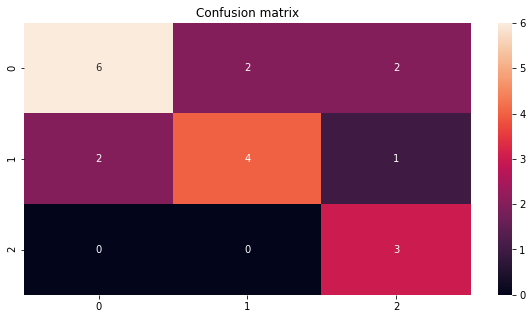

In [510]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [511]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.65


# RandomForestClassifier

In [517]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [518]:
y_pred = clf2.predict(X_test)

In [519]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.60      0.60      0.60        10
       best       0.67      0.57      0.62         7
      worst       0.50      0.67      0.57         3

avg / total       0.61      0.60      0.60        20



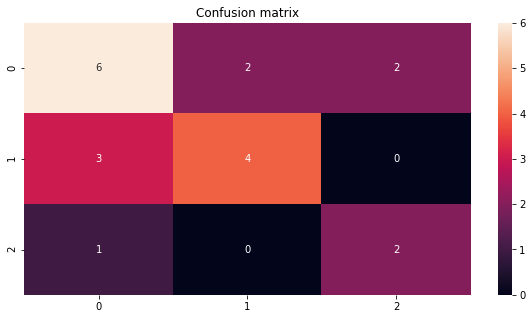

In [520]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [521]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6


# RandomForestClassifier с выбором лучших гиперпараметров

In [527]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    elif x == 'worst':
        y_test_1.append(0)
    else:
        y_test_1.append(2)

In [528]:
len(y_test_1)

20

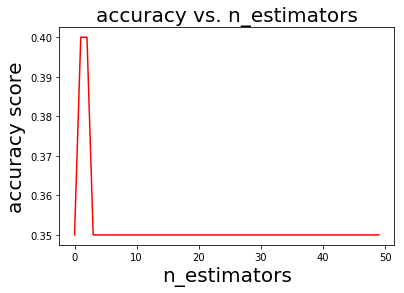

In [529]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [530]:
parameters = {
    'max_features': range(1, X_new_df.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=5, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 18), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [531]:
y_pred = clf2.predict(X_test)

In [532]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.50      0.30      0.37        10
       best       0.42      0.71      0.53         7
      worst       1.00      0.67      0.80         3

avg / total       0.55      0.50      0.49        20



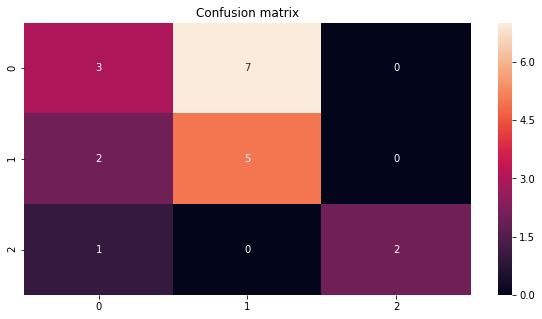

In [533]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [534]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.5


# Важность признаков

In [568]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(20,10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'])
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
    importance     name_feature
13    0.345775          prep_ph
6     0.170217            advcl
12    0.113069             poss
8     0.088820          clauses
17    0.085125               vp
11    0.063941         coord_ph
5     0.046935           rel_cl
0     0.022628           tokens
14    0.016472         noun+adj
9     0.013735            tunit
15    0.013320  ger_inf_as_subj
3     0.012936          midepth
2     0.007027          madepth
7     0.000000                s
1     0.000000          avdepth
10    0.000000    complex_tunit
4     0.000000              acl
16    0.000000        noun+part


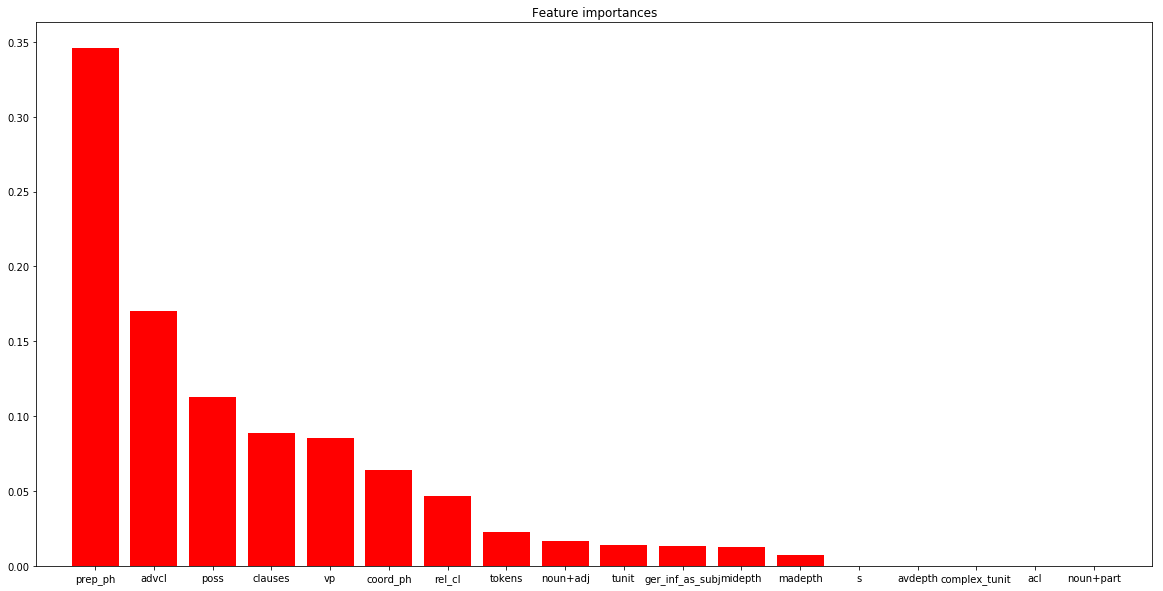

In [569]:
imp(clf2, X_new_df.columns)

# С большим количсетвом признаков

In [657]:
df.head()

,Name,mark,mark2,type,tokens,avdepth,madepth,midepth,acl,rel_cl,...,noun+part,vp,complex_np,dep_cl,dep_cl/s,cl/s,t_unit/s,coord_ph/s,complex_np/s,vp/s
0,AAl_13_1,best,best,1,282,4,8,2,6,1,...,3,20,64,10,1,2,2,1,6,2
1,AAl_27_1,best,best,1,211,5,10,3,0,0,...,0,12,77,1,0,1,1,1,8,1
2,AAl_30_1,best,best,1,232,4,5,2,2,1,...,1,23,64,4,0,1,1,0,5,2
3,ZEv_3_1,best,best,1,201,5,7,3,4,3,...,1,14,57,9,1,2,2,1,7,2
4,EEm_14_1,best,best,1,219,5,7,4,4,0,...,1,22,70,10,1,2,2,0,8,2


In [658]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/itogmore.csv',
                       sep=';', encoding='utf-8')

In [659]:
df.columns

Index(['Name', 'mark', 'mark2', 'type', 'tokens', 'avdepth', 'madepth',
       'midepth', 'acl', 'rel_cl', 'advcl', 's', 'clauses', 'tunit',
       'complex_tunit', 'coord_ph', 'poss', 'prep_ph', 'noun+adj',
       'ger_inf_as_subj', 'noun+part', 'vp', 'complex_np', 'dep_cl',
       'dep_cl/s', 'cl/s', 't_unit/s', 'coord_ph/s', 'complex_np/s', 'vp/s'],
      dtype='object')

In [660]:
new_df = df.drop(['Name', 'mark', 'type', 'avdepth', 'complex_tunit',
                  'acl', 'noun+part', 'noun+adj', 'ger_inf_as_subj'], axis=1)

In [661]:
y = new_df.values[:, 0]
X_new_df = new_df.drop(['mark2'], axis=1)
X_new_df[X_new_df.columns] = X_new_df[X_new_df.columns].astype(int)

In [662]:
X_new_df.shape

(96, 20)

In [667]:
X = X_new_df.values[:, 0:X_new_df.shape[1]]

In [668]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [669]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(1)

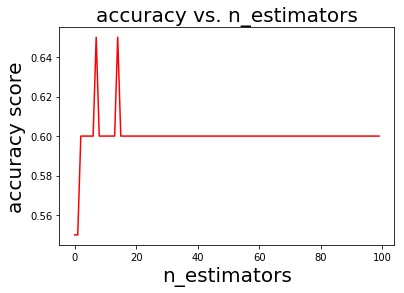

In [672]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(100):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [673]:
parameters = {
    'max_features': range(1, X_new_df.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 20), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [674]:
y_pred = clf2.predict(X_test)

In [675]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       best       0.67      0.46      0.55        13
    nonbest       0.36      0.57      0.44         7

avg / total       0.56      0.50      0.51        20



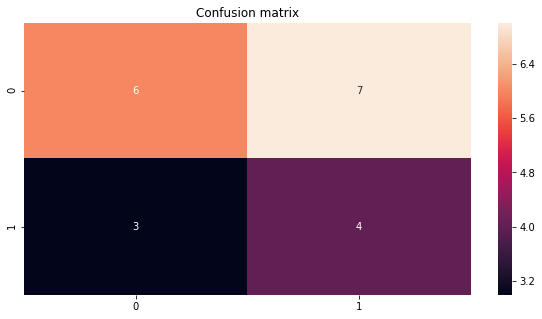

In [676]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [677]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.5


Feature ranking:
    importance  name_feature
6     0.142474       clauses
12    0.117541    complex_np
11    0.100587            vp
4     0.081378         advcl
0     0.079771        tokens
10    0.060922       prep_ph
7     0.054696         tunit
8     0.054596      coord_ph
3     0.044172        rel_cl
13    0.043084        dep_cl
1     0.041761       madepth
9     0.038867          poss
2     0.036056       midepth
5     0.031689             s
18    0.031429  complex_np/s
19    0.017716          vp/s
17    0.008252    coord_ph/s
16    0.006472      t_unit/s
14    0.005928      dep_cl/s
15    0.002609          cl/s


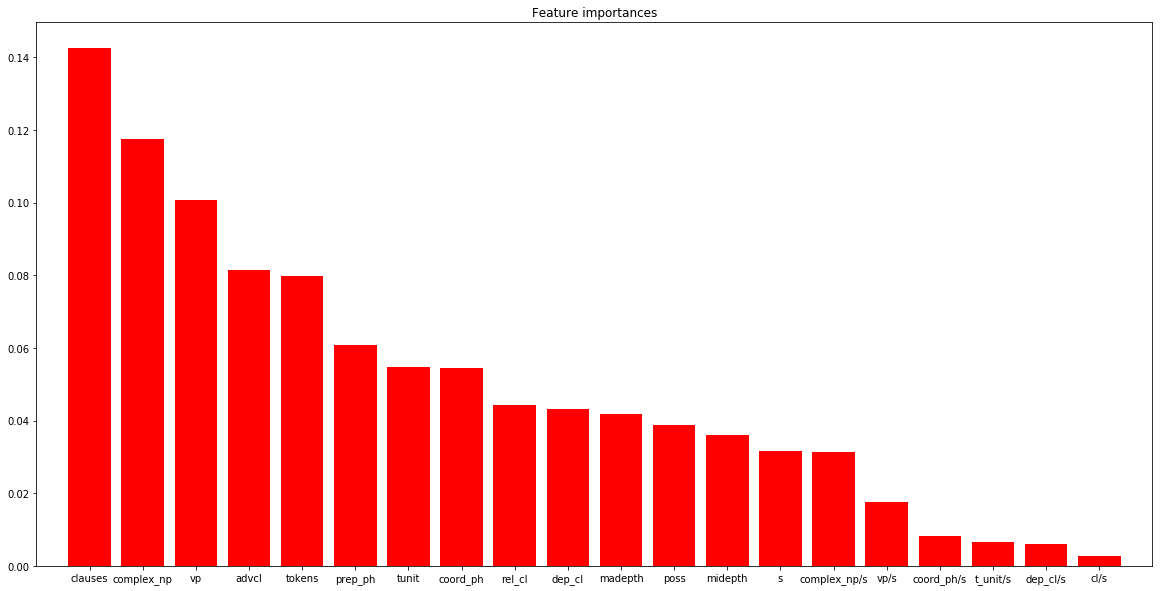

In [678]:
imp(clf2, X_new_df.columns)